<a href="https://colab.research.google.com/github/Arman001/AutoPrice-AI/blob/main/notebooks/Car_Pricing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dynamic Pricing Exploratory Data Analysis

## Importing Libraries

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing Dataset

In [316]:
df_cars = pd.read_csv('used_cars.csv')

In [317]:
df_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [318]:
df_cars.describe()

,model_year
count,4009.000000
mean,2015.515590
std,6.104816
min,1974.000000
25%,2012.000000
50%,2017.000000
75%,2020.000000
max,2024.000000


In [319]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


## Preprocessing Phase 1

In [320]:
missing_percent = (df_cars.isnull().sum() / len(df_cars)) * 100
print(missing_percent)

brand            0.000000
model            0.000000
model_year       0.000000
milage           0.000000
fuel_type        4.240459
engine           0.000000
transmission     0.000000
ext_col          0.000000
int_col          0.000000
accident         2.818658
clean_title     14.866550
price            0.000000
dtype: float64


In [321]:
df_cars['accident'].head(5)

,accident
0,At least 1 accident or damage reported
1,At least 1 accident or damage reported
2,None reported
3,None reported
4,None reported


In [322]:
df_cars['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [323]:
df_cars['accident'] = df_cars['accident'].map({'At least 1 accident or damage reported': 1, 'None reported': 0})

In [324]:
df_cars['milage'] = df_cars['milage'].str.replace(r'[^0-9]', '', regex=True).astype(float)
df_cars['engine'] = df_cars['engine'].str.extract(r'(\d+\.\d+|\d+)').astype(float)
df_cars['price'] = df_cars['price'].str.replace(r'[^0-9]', '', regex=True).astype(float)

df_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0,6-Speed A/T,Black,Black,1.0,Yes,10300.0
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,1.0,Yes,38005.0
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5,Automatic,Blue,Black,0.0,NaN,54598.0
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0,7-Speed A/T,Black,Black,0.0,Yes,15500.0
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,0.0,NaN,34999.0


## Exploratory Data Analysis

In [325]:
df_cars.describe()

,model_year,milage,engine,accident,price
count,4009.000000,4009.000000,3931.000000,3896.000000,4.009000e+03
mean,2015.515590,64717.551010,271.122005,0.253080,4.455319e+04
std,6.104816,52296.599459,168.878346,0.434832,7.871064e+04
min,1974.000000,100.000000,1.200000,0.000000,2.000000e+03
25%,2012.000000,23044.000000,178.500000,0.000000,1.720000e+04
50%,2017.000000,52775.000000,290.000000,0.000000,3.100000e+04
75%,2020.000000,94100.000000,382.000000,1.000000,4.999000e+04
max,2024.000000,405000.000000,1020.000000,1.000000,2.954083e+06


In [326]:
# unique values in categorical column
for col in df_cars.select_dtypes(include='object').columns:
    print(f"{col}: {df_cars[col].nunique()} unique values")

brand: 57 unique values
model: 1898 unique values
fuel_type: 7 unique values
transmission: 62 unique values
ext_col: 319 unique values
int_col: 156 unique values
clean_title: 1 unique values


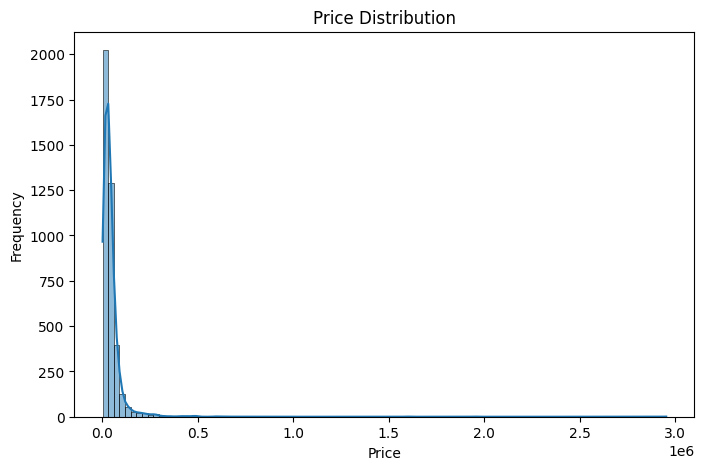

In [327]:
#price distirbution
plt.figure(figsize=(8, 5))
sns.histplot(df_cars['price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

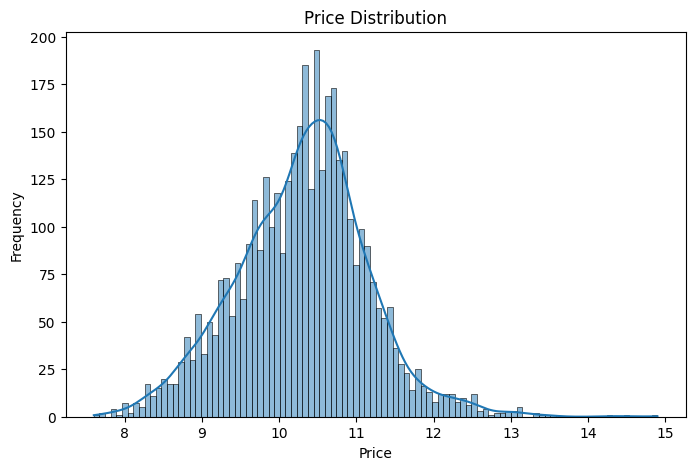

In [328]:
# normalizing the distribution with log
df_cars['log_price'] = np.log(df_cars['price'])

#price distirbution with log transformation
plt.figure(figsize=(8, 5))
sns.histplot(df_cars['log_price'], bins=100, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

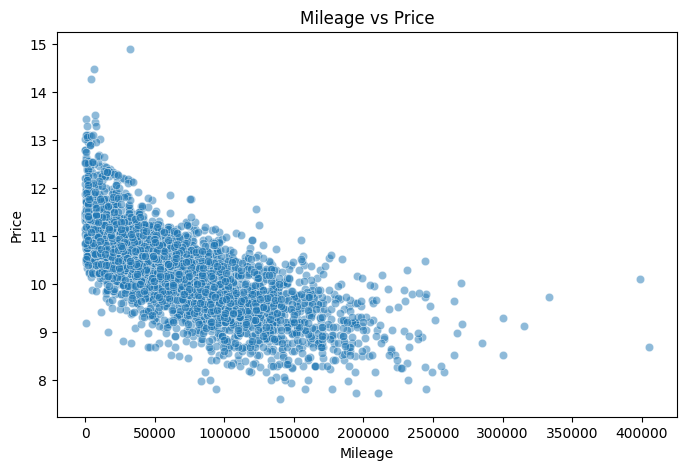

In [329]:
# mileage vs price
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_cars['milage'], y=df_cars['log_price'], alpha=0.5)
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

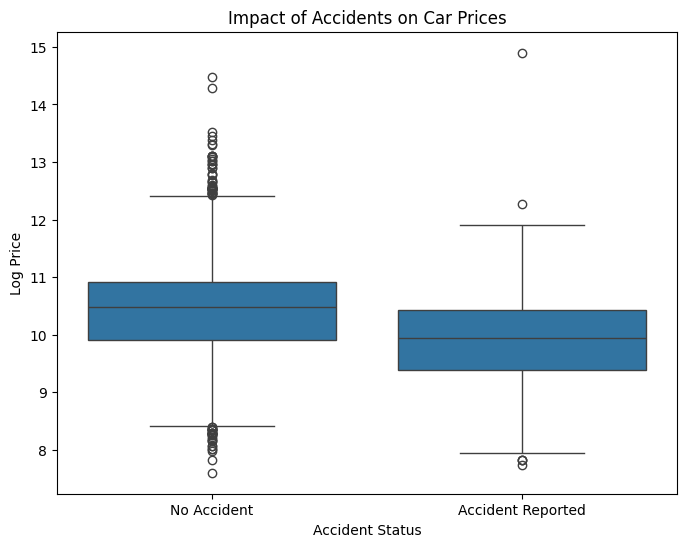

In [330]:
# price vs accident
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_cars['accident'], y=df_cars['log_price'])
plt.xticks([0, 1], ['No Accident', 'Accident Reported'])
plt.xlabel("Accident Status")
plt.ylabel("Log Price")
plt.title("Impact of Accidents on Car Prices")
plt.show()

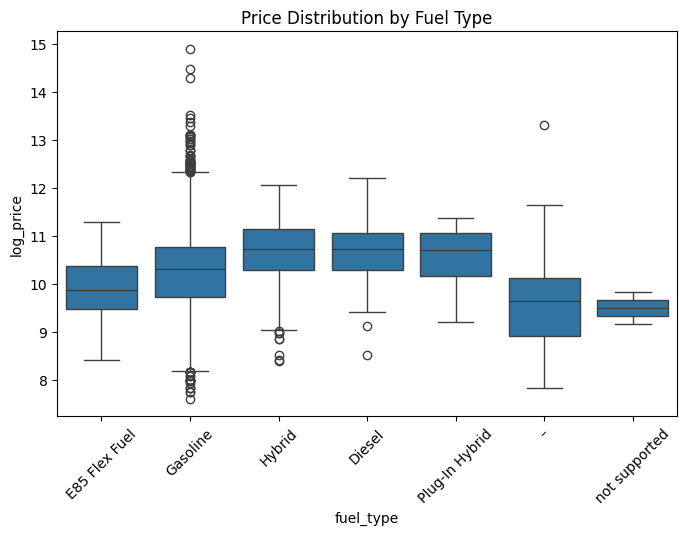

In [331]:
# price vs fuel
plt.figure(figsize=(8, 5))
sns.boxplot(x="fuel_type", y="log_price", data=df_cars)
plt.xticks(rotation=45)
plt.title("Price Distribution by Fuel Type")
plt.show()

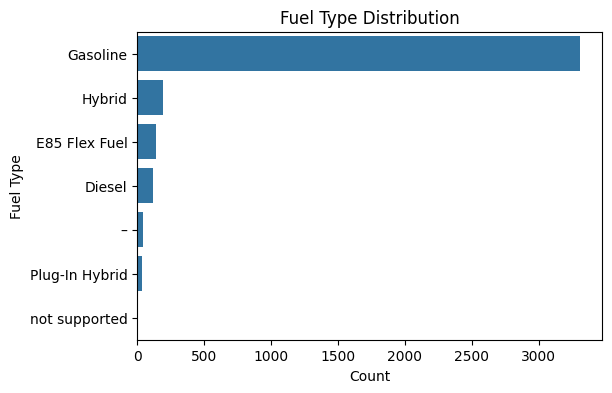

In [332]:
#fuel type distribution
plt.figure(figsize=(6, 4))
sns.countplot(y=df_cars['fuel_type'], order=df_cars['fuel_type'].value_counts().index)
plt.title("Fuel Type Distribution")
plt.xlabel("Count")
plt.ylabel("Fuel Type")
plt.show()

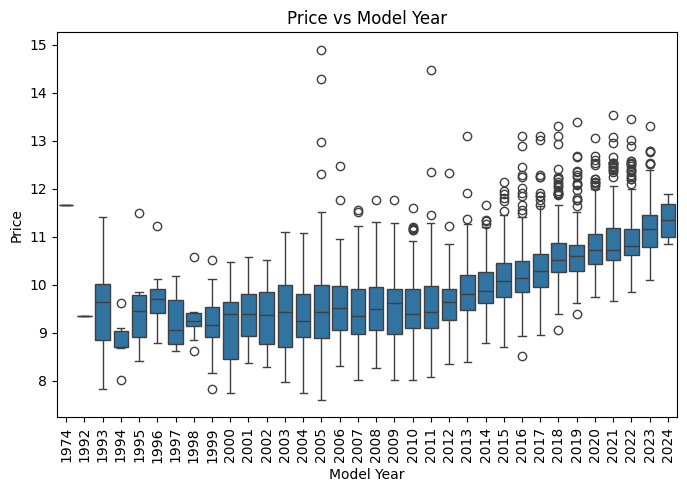

In [333]:
# model year and price
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cars['model_year'], y=df_cars['log_price'])
plt.xticks(rotation=90)
plt.title("Price vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()


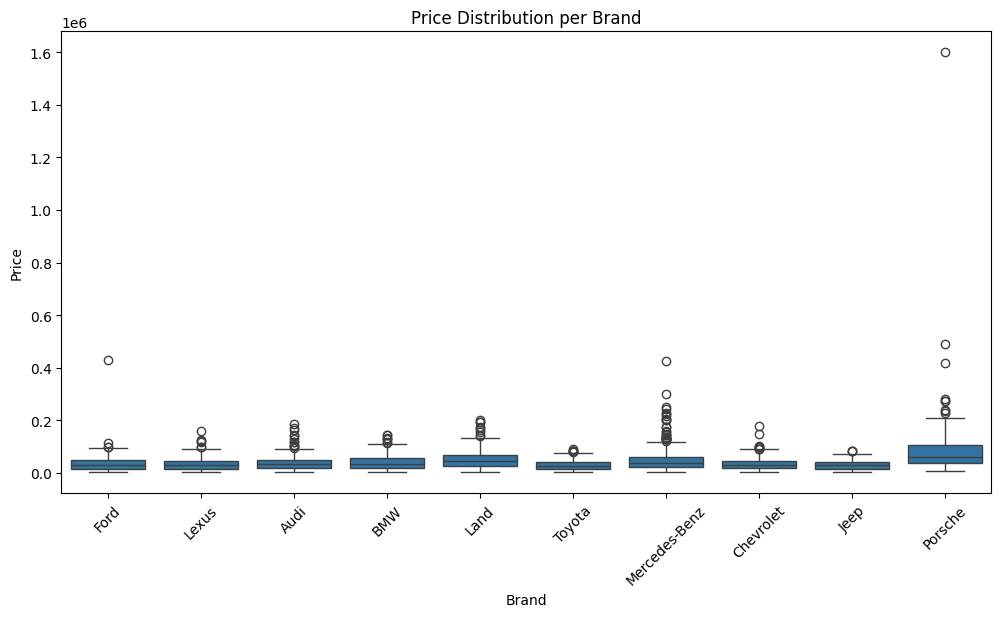

In [334]:
top_brands = df_cars['brand'].value_counts().head(10).index
df_top_cars = df_cars[df_cars['brand'].isin(top_brands)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='brand', y='price', data=df_top_cars)
plt.xticks(rotation=45)
plt.title("Price Distribution per Brand")
plt.xlabel("Brand")
plt.ylabel("Price")
plt.show()

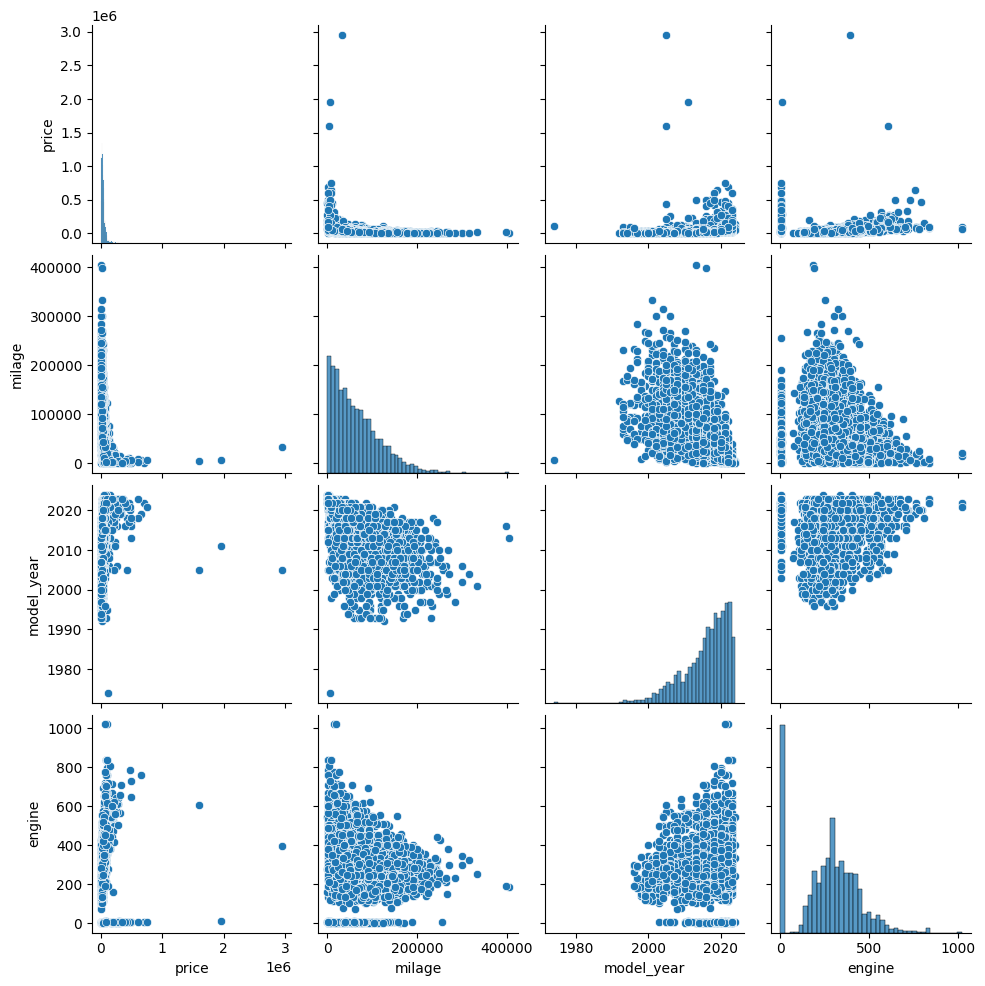

In [335]:
sns.pairplot(df_cars[['price', 'milage', 'model_year', 'engine']])
plt.show()

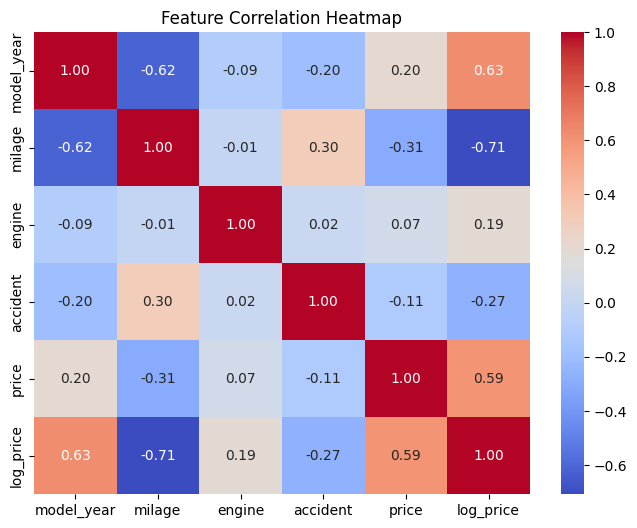

In [336]:
#corrleation heatmap
plt.figure(figsize=(8, 6))

# Select only numeric columns
numeric_df = df_cars.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [337]:
Q1 = df_cars['price'].quantile(0.25)
Q3 = df_cars['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_cars[(df_cars['price'] < lower_bound) | (df_cars['price'] > upper_bound)]
print(f"Number of outliers in price: {outliers.shape[0]}")


Number of outliers in price: 244


## Final Preprocessing

### Handling Missing Values

In [338]:
df_cars.isnull().sum()

,0
brand,0
model,0
model_year,0
milage,0
fuel_type,170
engine,78
transmission,0
ext_col,0
int_col,0
accident,113


In [339]:
df_cars.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,log_price
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0,6-Speed A/T,Black,Black,1.0,Yes,10300.0,9.239899
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8,8-Speed Automatic,Moonlight Cloud,Gray,1.0,Yes,38005.0,10.545473
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5,Automatic,Blue,Black,0.0,NaN,54598.0,10.907753
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0,7-Speed A/T,Black,Black,0.0,Yes,15500.0,9.648595
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0,8-Speed Automatic,Glacier White Metallic,Black,0.0,NaN,34999.0,10.463075


In [340]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     3839 non-null   object 
 5   engine        3931 non-null   float64
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      3896 non-null   float64
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
 12  log_price     4009 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 407.3+ KB


In [341]:
## handling fuel type
df_cars['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,3309
Hybrid,194
E85 Flex Fuel,139
Diesel,116
–,45
Plug-In Hybrid,34
not supported,2


In [342]:
df_cars[df_cars['fuel_type'].isna()]['brand'].value_counts()

,count
brand,
Tesla,87
Rivian,17
Ford,12
Porsche,9
Audi,6
BMW,5
Chevrolet,5
Nissan,5
Kia,4


In [343]:
# misisng electric brands fuel type is electric
electric_brands = ['Tesla', 'Rivian', 'Lucid', 'Polestar', 'Karma']
df_cars.loc[df_cars['brand'].isin(electric_brands), 'fuel_type'] = 'Electric'

# filling missing values by model fuel type
most_common_fuel_by_model = df_cars.groupby('model')['fuel_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df_cars['fuel_type'] = df_cars.apply(lambda row: most_common_fuel_by_model[row['model']] if pd.isna(row['fuel_type']) else row['fuel_type'], axis=1)

# filling remaining values with unknown
df_cars['fuel_type'] = df_cars['fuel_type'].fillna("Unknown")


df_cars['fuel_type'].isna().sum()


0

In [344]:
df_cars['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,3309
Hybrid,195
E85 Flex Fuel,139
Diesel,116
Electric,110
Unknown,59
–,45
Plug-In Hybrid,34
not supported,2


In [345]:
df_cars['fuel_type'] = df_cars['fuel_type'].replace({'–': 'Unknown', 'not supported': 'Unknown'})

# Filling  missing fuel types based on most common fuel type per model
most_common_fuel_by_model = df_cars.groupby('model')['fuel_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
df_cars['fuel_type'] = df_cars.apply(lambda row: most_common_fuel_by_model[row['model']] if row['fuel_type'] == "Unknown" else row['fuel_type'], axis=1)

# Filling remaining unknowns using the most common fuel type per brand
most_common_fuel_by_brand = df_cars.groupby('brand')['fuel_type'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else "Unknown")
df_cars['fuel_type'] = df_cars.apply(lambda row: most_common_fuel_by_brand[row['brand']] if row['fuel_type'] == "Unknown" else row['fuel_type'], axis=1)

df_cars['fuel_type'].value_counts()

,count
fuel_type,
Gasoline,3413
Hybrid,196
E85 Flex Fuel,140
Diesel,116
Electric,110
Plug-In Hybrid,34


In [346]:
# handling engine values
df_cars[df_cars['engine'].isna()]['brand'].value_counts()

,count
brand,
Tesla,18
Dodge,8
Ford,7
Porsche,6
Nissan,4
Toyota,4
Chevrolet,4
Mazda,4
Cadillac,3


In [347]:
df_cars['engine'].value_counts()

,count
engine,
2.0,135
300.0,107
3.5,78
3.0,72
420.0,71
...,...
76.0,1
6.3,1
258.0,1


In [348]:
# for electric cars
df_cars.loc[df_cars['fuel_type'] == 'Electric', 'engine'] = 0.0

# repalcing with model size
most_common_engine_by_model = df_cars.groupby('model')['engine'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df_cars['engine'] = df_cars.apply(lambda row: most_common_engine_by_model[row['model']] if pd.isna(row['engine']) else row['engine'], axis=1)

# most common size of brand
most_common_engine_by_brand = df_cars.groupby('brand')['engine'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
df_cars['engine'] = df_cars.apply(lambda row: most_common_engine_by_brand[row['brand']] if pd.isna(row['engine']) else row['engine'], axis=1)

# remaining filled with most common
df_cars['engine'] = df_cars['engine'].fillna(df_cars['engine'].mode()[0])

df_cars['engine'].isna().sum()



0

In [349]:
df_cars['engine'].value_counts()

,count
engine,
2.0,135
0.0,110
300.0,109
3.5,82
355.0,76
...,...
258.0,1
78.0,1
1.8,1


In [350]:
# handling missing values in accident column
df_cars['accident'].value_counts()

,count
accident,
0.0,2910
1.0,986


In [351]:
# Filling based on clean_title
df_cars.loc[(df_cars['accident'].isna()) & (df_cars['clean_title'] == 'True'), 'accident'] = 0
df_cars.loc[(df_cars['accident'].isna()) & (df_cars['clean_title'] == 'False'), 'accident'] = 1

# Filling remaining NaN values based on most common accident status per model
most_common_accident_by_model = df_cars.groupby('model')['accident'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else 0)
df_cars['accident'] = df_cars.apply(lambda row: most_common_accident_by_model[row['model']] if pd.isna(row['accident']) else row['accident'], axis=1)

In [352]:
df_cars['accident'].value_counts()

,count
accident,
0.0,3012
1.0,997


In [353]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         4009 non-null   object 
 1   model         4009 non-null   object 
 2   model_year    4009 non-null   int64  
 3   milage        4009 non-null   float64
 4   fuel_type     4009 non-null   object 
 5   engine        4009 non-null   float64
 6   transmission  4009 non-null   object 
 7   ext_col       4009 non-null   object 
 8   int_col       4009 non-null   object 
 9   accident      4009 non-null   float64
 10  clean_title   3413 non-null   object 
 11  price         4009 non-null   float64
 12  log_price     4009 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 407.3+ KB


In [354]:
df_cars['transmission'].value_counts()

,count
transmission,
A/T,1037
8-Speed A/T,406
Transmission w/Dual Shift Mode,398
6-Speed A/T,362
6-Speed M/T,248
...,...
"Automatic, 8-Spd PDK Dual-Clutch",1
"Auto, 6-Spd w/CmdShft",1
"Automatic, 8-Spd Sport w/Sport & Manual Modes",1


In [355]:
df_cars['ext_col'].value_counts()

,count
ext_col,
Black,905
White,816
Gray,496
Silver,374
Blue,349
...,...
Anthracite Blue Metallic,1
Moonlight Cloud,1
Silver Mist,1


In [356]:
df_cars['int_col'].value_counts()

,count
int_col,
Black,2025
Beige,538
Gray,472
Brown,157
–,133
...,...
Almond Beige,1
Kyalami Orange,1
Sakhir Orange,1


### Encoding

In [357]:
## too many values in ext and int we need to group them into general colors first
def map_ext_color(color):
    color = str(color).lower()
    if "black" in color: return "Black"
    elif "white" in color: return "White"
    elif "gray" in color or "grey" in color: return "Gray"
    elif "silver" in color: return "Silver"
    elif "blue" in color: return "Blue"
    elif "red" in color: return "Red"
    elif "green" in color: return "Green"
    elif "yellow" in color or "gold" in color: return "Yellow/Gold"
    elif "orange" in color or "bronze" in color: return "Orange/Bronze"
    elif "purple" in color: return "Purple"
    else: return "Other"

df_cars['ext_col'] = df_cars['ext_col'].apply(map_ext_color)

def map_int_color(color):
    color = str(color).lower()
    if "black" in color: return "Black"
    elif "beige" in color or "tan" in color or "ivory" in color: return "Beige/Tan"
    elif "gray" in color or "grey" in color: return "Gray"
    elif "brown" in color or "chestnut" in color or "mocha" in color: return "Brown"
    elif "white" in color or "ivory" in color: return "White"
    elif "red" in color or "burgundy" in color: return "Red"
    elif "blue" in color or "navy" in color: return "Blue"
    elif "green" in color: return "Green"
    else: return "Other"

df_cars['int_col'] = df_cars['int_col'].apply(map_int_color)

In [358]:
df_cars['ext_col'].value_counts()

,count
ext_col,
Black,1016
White,922
Gray,546
Silver,421
Blue,395
Red,311
Other,195
Green,80
Yellow/Gold,72


In [359]:
df_cars['int_col'].value_counts()

,count
int_col,
Black,2155
Beige/Tan,561
Gray,484
Other,337
Brown,167
Red,134
White,129
Blue,34
Green,8


In [360]:
# One-Hot Encoding
df_cars = pd.get_dummies(df_cars, columns=['fuel_type', 'ext_col', 'int_col'], drop_first=True)
df_cars.columns

Index(['brand', 'model', 'model_year', 'milage', 'engine', 'transmission',
       'accident', 'clean_title', 'price', 'log_price',
       'fuel_type_E85 Flex Fuel', 'fuel_type_Electric', 'fuel_type_Gasoline',
       'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'ext_col_Blue',
       'ext_col_Gray', 'ext_col_Green', 'ext_col_Orange/Bronze',
       'ext_col_Other', 'ext_col_Purple', 'ext_col_Red', 'ext_col_Silver',
       'ext_col_White', 'ext_col_Yellow/Gold', 'int_col_Black', 'int_col_Blue',
       'int_col_Brown', 'int_col_Gray', 'int_col_Green', 'int_col_Other',
       'int_col_Red', 'int_col_White'],
      dtype='object')

In [361]:
df_cars

,brand,model,model_year,milage,engine,transmission,accident,clean_title,price,log_price,...,ext_col_White,ext_col_Yellow/Gold,int_col_Black,int_col_Blue,int_col_Brown,int_col_Gray,int_col_Green,int_col_Other,int_col_Red,int_col_White
0,Ford,Utility Police Interceptor Base,2013,51000.0,300.0,6-Speed A/T,1.0,Yes,10300.0,9.239899,...,False,False,True,False,False,False,False,False,False,False
1,Hyundai,Palisade SEL,2021,34742.0,3.8,8-Speed Automatic,1.0,Yes,38005.0,10.545473,...,False,False,False,False,False,True,False,False,False,False
2,Lexus,RX 350 RX 350,2022,22372.0,3.5,Automatic,0.0,NaN,54598.0,10.907753,...,False,False,True,False,False,False,False,False,False,False
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,354.0,7-Speed A/T,0.0,Yes,15500.0,9.648595,...,False,False,True,False,False,False,False,False,False,False
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,2.0,8-Speed Automatic,0.0,NaN,34999.0,10.463075,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714.0,6.0,8-Speed Automatic with Auto-Shift,0.0,Yes,349950.0,12.765546,...,False,False,False,False,False,False,False,True,False,False
4005,Audi,S4 3.0T Premium Plus,2022,10900.0,349.0,Transmission w/Dual Shift Mode,0.0,Yes,53900.0,10.894886,...,False,False,True,False,False,False,False,False,False,False
4006,Porsche,Taycan,2022,2116.0,400.0,Automatic,0.0,NaN,90998.0,11.418593,...,False,False,True,False,False,False,False,False,False,False
4007,Ford,F-150 Raptor,2020,33000.0,450.0,A/T,0.0,Yes,62999.0,11.050874,...,False,False,True,False,False,False,False,False,False,False


In [362]:
# label encoding brands
le = LabelEncoder()
df_cars['brand'] = le.fit_transform(df_cars['brand'])
df_cars['brand'].head()

,brand
0,14
1,19
2,27
3,20
4,3


In [363]:
# transmission has also too many values
def group_transmission(value):
    if 'A/T' in value or 'Automatic' in value:
        return 'Automatic'
    elif 'M/T' in value or 'Manual' in value:
        return 'Manual'
    elif 'CVT' in value:
        return 'CVT'
    elif 'Dual-Clutch' in value:
        return 'Dual-Clutch'
    else:
        return 'Other'

df_cars['transmission'] = df_cars['transmission'].apply(group_transmission)
df_cars['transmission'].value_counts()

,count
transmission,
Automatic,3148
Other,426
Manual,372
CVT,63


In [364]:
# applying one hot encoding
df_cars = pd.get_dummies(df_cars, columns=['transmission'], drop_first=True)
df_cars.columns

Index(['brand', 'model', 'model_year', 'milage', 'engine', 'accident',
       'clean_title', 'price', 'log_price', 'fuel_type_E85 Flex Fuel',
       'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hybrid',
       'fuel_type_Plug-In Hybrid', 'ext_col_Blue', 'ext_col_Gray',
       'ext_col_Green', 'ext_col_Orange/Bronze', 'ext_col_Other',
       'ext_col_Purple', 'ext_col_Red', 'ext_col_Silver', 'ext_col_White',
       'ext_col_Yellow/Gold', 'int_col_Black', 'int_col_Blue', 'int_col_Brown',
       'int_col_Gray', 'int_col_Green', 'int_col_Other', 'int_col_Red',
       'int_col_White', 'transmission_CVT', 'transmission_Manual',
       'transmission_Other'],
      dtype='object')

In [365]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   brand                     4009 non-null   int64  
 1   model                     4009 non-null   object 
 2   model_year                4009 non-null   int64  
 3   milage                    4009 non-null   float64
 4   engine                    4009 non-null   float64
 5   accident                  4009 non-null   float64
 6   clean_title               3413 non-null   object 
 7   price                     4009 non-null   float64
 8   log_price                 4009 non-null   float64
 9   fuel_type_E85 Flex Fuel   4009 non-null   bool   
 10  fuel_type_Electric        4009 non-null   bool   
 11  fuel_type_Gasoline        4009 non-null   bool   
 12  fuel_type_Hybrid          4009 non-null   bool   
 13  fuel_type_Plug-In Hybrid  4009 non-null   bool   
 14  ext_col_

## Final Features Selection

In [366]:
# Drop unnecessary columns
df_cars_cleaned = df_cars.drop(columns=["model", "clean_title"])
# Save to CSV
df_cars_cleaned.to_csv("cleaned_car_data.csv", index=False)

print("✅ Cleaned dataset saved as 'cleaned_car_data.csv'")

✅ Cleaned dataset saved as 'cleaned_car_data.csv'
